# Customer Churn Prediction

## Life Cycle of a Machine Learning Project

## 1. Understanding the Problem Statement
- Define the problem clearly.
- Identify objectives and success metrics.
- Understand constraints and requirements.

## 2. Data Collection
- Gather data from relevant sources.
- Ensure data quality and completeness.
- Consider data privacy and legal constraints.

## 3. Data Checks to Perform
- Check for missing values.
- Identify duplicates.
- Verify data types and ranges.
- Detect outliers and inconsistencies.

## 4. Exploratory Data Analysis (EDA)
- Visualize data distributions.
- Explore correlations between features.
- Identify patterns, trends, and anomalies.

## 5. Data Pre-Processing
- Handle missing values.
- Encode categorical variables.
- Scale or normalize features.
- Feature engineering and selection.

## 6. Model Training
- Split data into training and testing sets.
- Choose appropriate algorithms.
- Train models on the training set.
- Tune hyperparameters.

## 7. Choose Best Model
- Evaluate models using performance metrics.
- Compare results across multiple models.
- Select the model that best meets objectives.
- Document and prepare for deployment.


## 1) Problem Statement

This project aims to understand and predict **customer churn**, which occurs when customers stop using a company's products or services. The goal is to identify the factors that influence churn, such as:

- Customer demographics (age, gender, location)
- Subscription type or service usage
- Account tenure and engagement metrics
- Customer complaints or support interactions
- Payment history and billing information

By analyzing these variables, the project seeks to predict which customers are likely to churn and help the company implement strategies to **retain customers** and **reduce revenue loss**.


## 2) Data Collection

For this Customer Churn project, the dataset is sourced from Kaggle:

**Dataset:** [Telco Customer Churn (11.1.3+)](https://www.kaggle.com/datasets/alfathterry/telco-customer-churn-11-1-3/data)  
**Rows:** 7,043  
**Columns:** 50  
**Size:** Approximately 1.8 MB

### 2.1 Import Data and Required Packages

### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/telco.csv')

### Top 5 Records

In [3]:
df.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


### Shape of the dataset

In [4]:
df.shape

(7043, 50)

### 2.2 Dataset information
### Customer Information
- **CustomerID:** A unique ID for each customer.  
- **Gender:** Male or Female.  
- **Age:** Customer’s age in years.  
- **Senior Citizen:** Yes if 65 or older, No otherwise.  
- **Married:** Yes/No.  
- **Dependents:** Yes/No; indicates if the customer has dependents.  
- **Number of Dependents:** Number of dependents living with the customer.  
- **Country / State / City / Zip Code / Latitude / Longitude:** Customer's primary residence information.  
- **Population:** Estimated population in the customer’s Zip Code area.

### Account Information
- **Quarter:** Fiscal quarter of data (e.g., Q3).  
- **Referred a Friend:** Yes/No; indicates if the customer referred someone.  
- **Number of Referrals:** Total referrals made by the customer.  
- **Tenure in Months:** Total months with the company.  
- **Offer:** Last marketing offer accepted (None, Offer A-E).  

### Services and Usage
- **Phone Service:** Yes/No.  
- **Avg Monthly Long Distance Charges:** Average charges for long distance calls.  
- **Multiple Lines:** Yes/No.  
- **Internet Service:** Type of internet service (No, DSL, Fiber Optic, Cable).  
- **Avg Monthly GB Download:** Average monthly download in GB.  
- **Online Security, Online Backup, Device Protection Plan, Premium Tech Support:** Yes/No.  
- **Streaming TV / Movies / Music:** Yes/No.  
- **Unlimited Data:** Yes/No.  

### Billing and Payments
- **Contract:** Month-to-Month, One Year, Two Year.  
- **Paperless Billing:** Yes/No.  
- **Payment Method:** Bank Withdrawal, Credit Card, Mailed Check.  
- **Monthly Charge, Total Charges, Total Refunds, Total Extra Data Charges, Total Long Distance Charges:** Billing-related metrics.

### Customer Satisfaction
- **Satisfaction Score:** Rating from 1 (Very Unsatisfied) to 5 (Very Satisfied).  
- **Satisfaction Score Label:** Text version of the rating.  

### Churn Information
- **Customer Status:** Churned, Stayed, or Joined.  
- **Churn Label / Value:** Yes/No or 1/0; indicates if the customer left the company.  
- **Churn Score:** 0-100 predictive score from IBM SPSS Modeler.  
- **Churn Score Category:** Categories based on score ranges.  
- **CLTV / CLTV Category:** Customer Lifetime Value and its category.  
- **Churn Category / Reason:** Reason for customer churn, e.g., Price, Competitor, Dissatisfaction, Other, Attitude.

## 3) Data Checks to Perform

Before starting analysis, it is important to perform initial checks on the dataset to understand its quality and structure. Key checks include:

- **Check Missing Values:** Identify if any columns have missing/null values that need to be handled.  
- **Check Duplicates:** Detect and remove duplicate rows to avoid bias in analysis.  
- **Check Data Types:** Verify the type of each column (numerical, categorical, datetime, etc.) to ensure proper processing.  
- **Check Number of Unique Values:** Determine the number of unique entries in each column to understand categorical variables and cardinality.  
- **Check Statistics of Dataset:** Review summary statistics (mean, median, min, max, standard deviation) for numerical columns.  
- **Check Various Categories in Categorical Columns:** Examine all unique categories in categorical columns to identify anomalies or rare classes.  


### 3.1 Check Missing values


In [5]:
df.isna().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                  

### 3.2 Handling Missing Values

In [6]:
df['Internet Type'] = df['Internet Type'].fillna("No Internet Connection")
df['Offer'] = df['Offer'].fillna("None")
df['Churn Category'] = df['Churn Category'].fillna('Not Applicable')
df['Churn Reason'] = df['Churn Reason'].fillna('Not Applicable')

### 3.3 Check Duplicates

In [7]:
df.duplicated().sum()

0

#### There are no duplicates values in the data set

### 3.4 Check data types

In [8]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

### 3.5 Checking the number of unique values of each column

In [9]:
df.nunique()

Customer ID                          7043
Gender                                  2
Age                                    62
Under 30                                2
Senior Citizen                          2
Married                                 2
Dependents                              2
Number of Dependents                   10
Country                                 1
State                                   1
City                                 1106
Zip Code                             1626
Latitude                             1626
Longitude                            1625
Population                           1569
Quarter                                 1
Referred a Friend                       2
Number of Referrals                    12
Tenure in Months                       72
Offer                                   6
Phone Service                           2
Avg Monthly Long Distance Charges    3584
Multiple Lines                          2
Internet Service                  

### 3.6 Check statistics of data set

In [10]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,58.505040,4400.295755
std,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,21.170031,1183.057152
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,5.000000,2003.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,40.000000,3469.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,61.000000,4527.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,75.500000,5380.500000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,96.000000,6500.000000


### Insights from Numerical Data

After examining the descriptive statistics of the numerical features, the following insights can be drawn:

- **Age:**  
  - Mean age of customers is ~46.5 years.  
  - Standard deviation is ~16.75, indicating a moderately wide spread.  
  - Youngest customer is 19 and oldest is 80, showing a diverse age range.

- **Number of Dependents:**  
  - Most customers have 0 dependents (median = 0).  
  - Maximum number of dependents is 9, but mean is only ~0.47, suggesting most customers live alone or with few dependents.

- **Location (Zip Code, Latitude, Longitude, Population):**  
  - Zip Codes range from 90001 to 96150.  
  - Latitude and Longitude indicate coverage across multiple states.  
  - Population varies widely from 11 to 105,285 per area.

- **Customer Engagement:**  
  - **Number of Referrals:** Most customers have referred 0 people; maximum referrals = 11.  
  - **Tenure in Months:** Average tenure is ~32 months, ranging from 1 to 72 months.

- **Service Usage and Billing:**  
  - **Avg Monthly Long Distance Charges:** Mean ~22.96, maximum ~50.  
  - **Avg Monthly GB Download:** Mean ~20.52 GB; some customers download up to 85 GB.  
  - **Monthly Charges:** Average monthly bill ~64.76, with a max of 118.75.  
  - **Total Charges:** Mean ~2,280, but max ~8,684, showing some high-value customers.  
  - **Total Refunds, Extra Data, Long Distance Charges:** Some customers have unusually high extra charges, suggesting outliers.

- **Customer Metrics:**  
  - **Satisfaction Score:** Average score ~3.24, ranging 1–5.  
  - **Churn Score:** Mean ~58.5, max 96, showing that some customers are highly likely to churn.  
  - **CLTV (Customer Lifetime Value):** Average ~4,400; high CLTV customers (max 6,500) are critical for retention.

**Observations:**  
- Many numerical features are moderately skewed (e.g., Tenure, Total Charges, Extra Charges).  
- There are clear outliers in several columns (Population, Total Charges, Extra Data Charges, Long Distance Charges).  
- Most customers have low numbers of dependents and referrals.  
- High churn risk customers can be identified using `Churn Score` and high-value customers using `CLTV`.


### 3.7 Exploring Data

In [11]:
df.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [12]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 19 numerical features : ['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude', 'Population', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Score', 'CLTV']

We have 31 categorical features : ['Customer ID', 'Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Country', 'State', 'City', 'Quarter', 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Customer Status', 'Churn Label', 'Churn Category', 'Churn Reason']


## 3.8 Numerical Data Insights

We have **19 numerical features**:  
`['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude', 'Population', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Score', 'CLTV']`


In [13]:
df['total_charges_plus_refunds'] = df['Total Charges'] + df['Total Refunds']
df['average_monthly_charge'] = df['Monthly Charge'] + df['Avg Monthly GB Download']

In [14]:
df['total_revenue_metric'] = df['Total Charges'] + df['Total Refunds'] + df['Total Extra Data Charges'] + df['Total Long Distance Charges']

df['average_monthly_metric'] = (df['Monthly Charge'] + df['Avg Monthly GB Download'] + df['Avg Monthly Long Distance Charges']) / 3


# 4) Exploring Data (Visualization)

Visualization helps us understand the **distribution of numerical features** and identify trends, outliers, or patterns in the dataset.

### 4.1 Visualize Average/Total Metrics Distribution

We can visualize distributions for **numerical features** such as `Monthly Charge`, `Total Charges`, `Churn Score`, and `CLTV`.

**Techniques:**
- **Histogram:** Shows frequency distribution of values.
- **Kernel Density Estimate (KDE):** Shows smooth probability density of values.

### 4.1.1 Histogram + KDE for average_monthly_metric

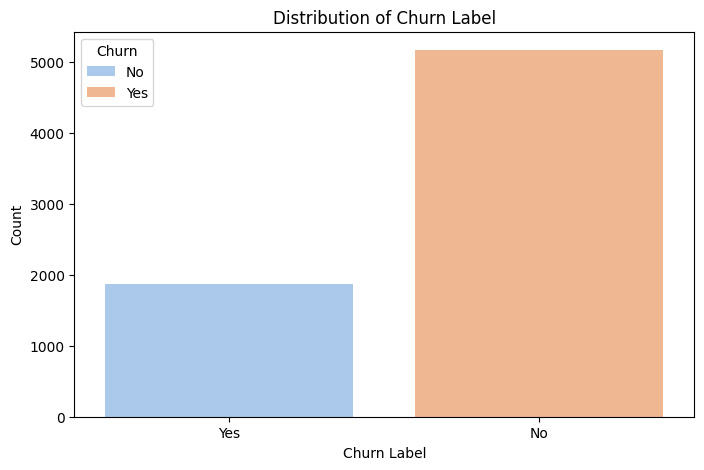

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Churn Label', palette='pastel')
plt.title('Distribution of Churn Label')
plt.xlabel('Churn Label')
plt.ylabel('Count')
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

### 4.1.2  Histogram + KDE for Monthly Charge

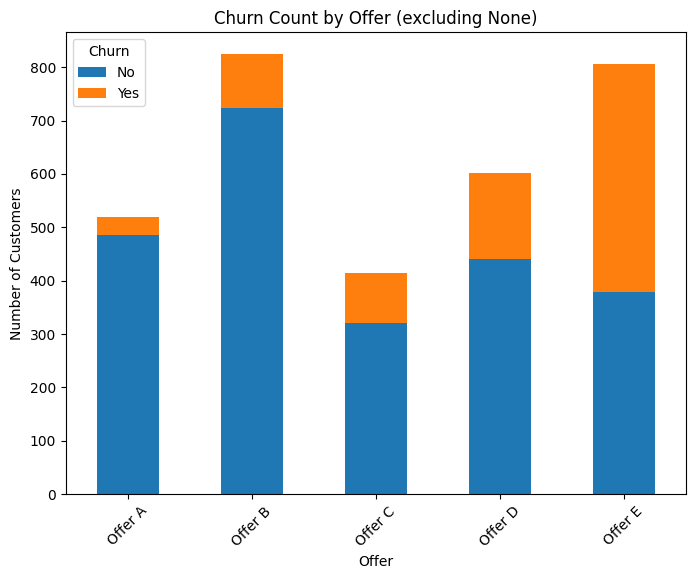

In [16]:
offer_churn = pd.crosstab(df.loc[df['Offer'] != "None", 'Offer'], df['Churn Label'])

offer_churn.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title("Churn Count by Offer (excluding None)")
plt.xlabel("Offer")
plt.ylabel("Number of Customers")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.xticks(rotation=45)
plt.show()

### 4.1.3 Boxplot for Total Charges

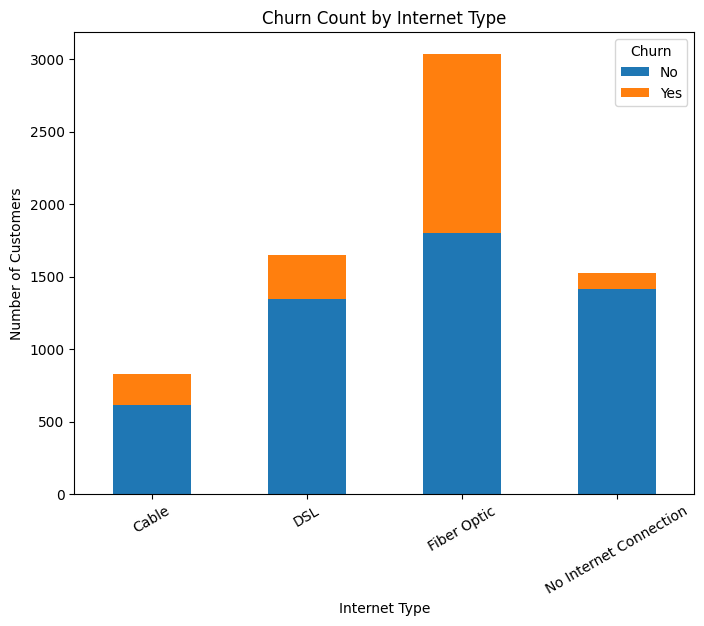

In [17]:
offer_churn = pd.crosstab(df['Internet Type'], df['Churn Label'])

offer_churn.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title("Churn Count by Internet Type")
plt.xlabel("Internet Type")
plt.ylabel("Number of Customers")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.xticks(rotation=30)
plt.show()

### 4.1.4 Countplot for Contract type

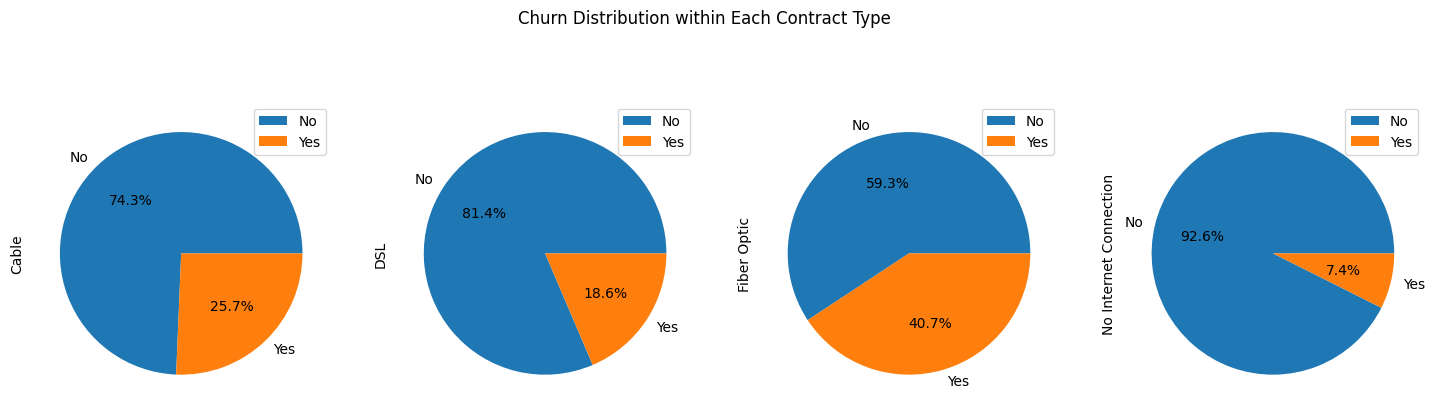

In [18]:
offer_churn.T.plot(kind='pie', subplots=True, figsize=(18,8), autopct="%.1f%%")
plt.suptitle("Churn Distribution within Each Contract Type", y=0.8) 
plt.show()


### Scatterplot: Tenure vs Total Charges colored by Churn Label

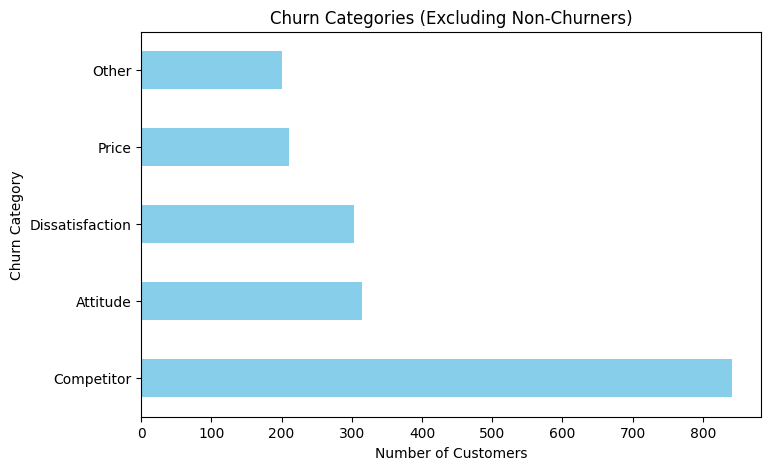

In [19]:
df['Churn Category'].value_counts().drop("Not Applicable").plot(kind='barh', figsize=(8,5), color="skyblue")

plt.title("Churn Categories (Excluding Non-Churners)")
plt.xlabel("Number of Customers")
plt.ylabel("Churn Category")
plt.show()

### Pairplot of selected numerical features

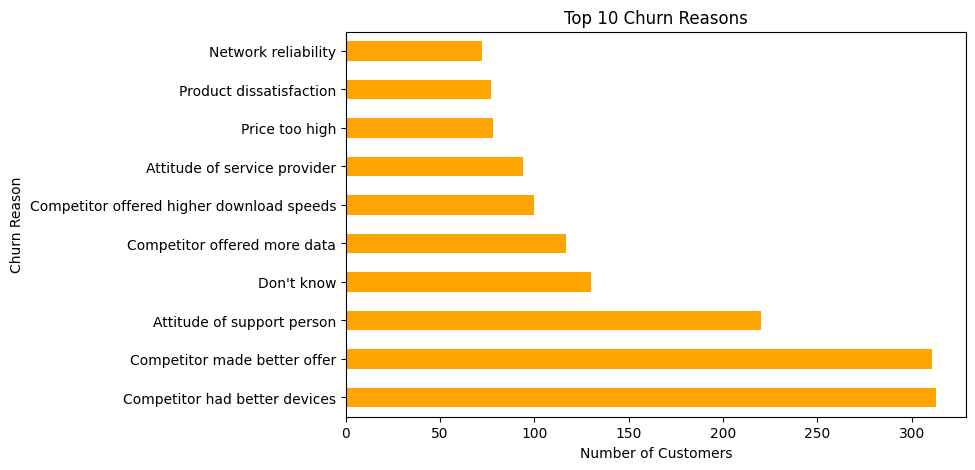

In [20]:
df['Churn Reason'].value_counts().drop("Not Applicable").head(10).plot(kind='barh', figsize=(8,5), color="orange")
plt.title("Top 10 Churn Reasons")
plt.xlabel("Number of Customers")
plt.show()

### Correlation Heatmap

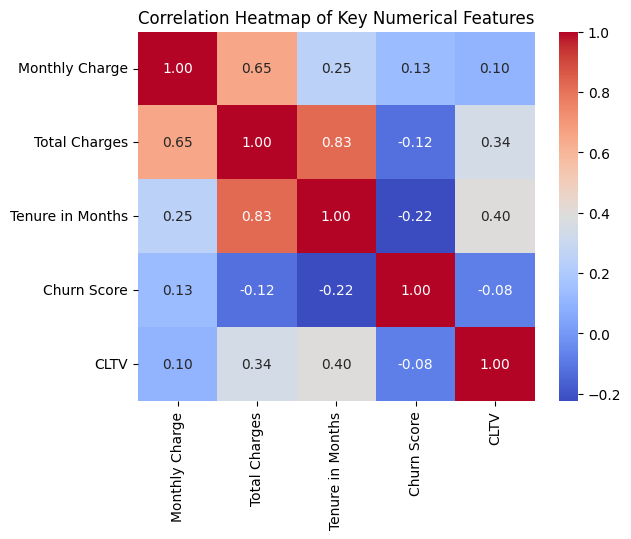

In [23]:
numerical_features = ['Monthly Charge','Total Charges','Tenure in Months','Churn Score','CLTV']
corr = df[numerical_features].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Key Numerical Features')
plt.show()

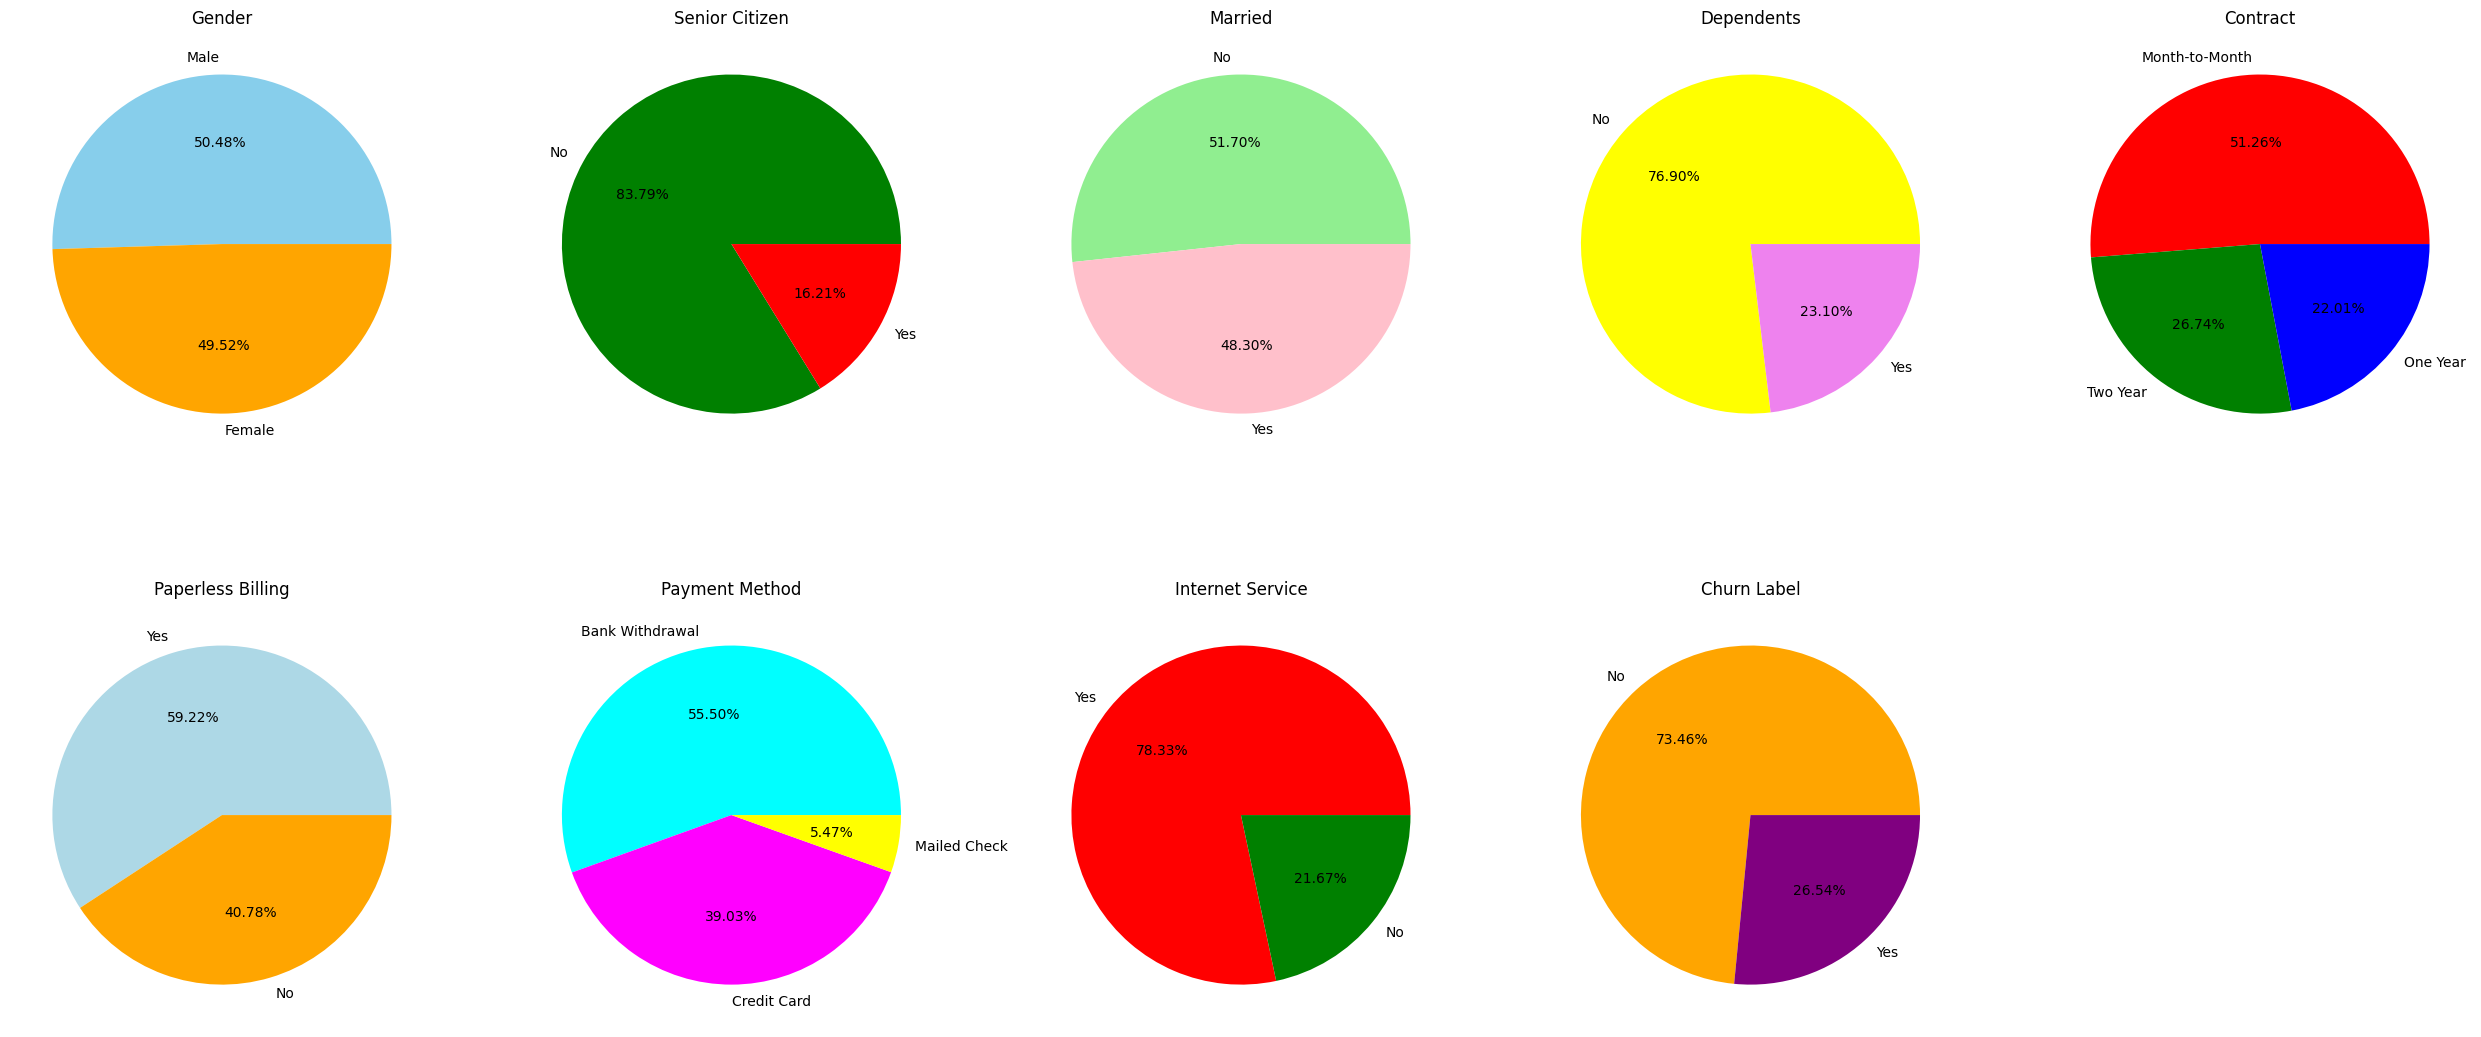

In [21]:
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = (25, 12)


plt.subplot(2, 5, 1)
size = df['Gender'].value_counts()
labels = size.index
colors = ['skyblue','orange']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Gender')


plt.subplot(2, 5, 2)
size = df['Senior Citizen'].value_counts()
labels = size.index
colors = ['green','red']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Senior Citizen')


plt.subplot(2, 5, 3)
size = df['Married'].value_counts()
labels = size.index
colors = ['lightgreen','pink']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Married')


plt.subplot(2, 5, 4)
size = df['Dependents'].value_counts()
labels = size.index
colors = ['yellow','violet']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Dependents')


plt.subplot(2, 5, 5)
size = df['Contract'].value_counts()
labels = size.index
colors = ['red','green','blue']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Contract')


plt.subplot(2, 5, 6)
size = df['Paperless Billing'].value_counts()
labels = size.index
colors = ['lightblue','orange']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Paperless Billing')


plt.subplot(2, 5, 7)
size = df['Payment Method'].value_counts()
labels = size.index
colors = ['cyan','magenta','yellow','grey']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Payment Method')


plt.subplot(2, 5, 8)
size = df['Internet Service'].value_counts()
labels = size.index
colors = ['red','green','blue']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Internet Service')


plt.subplot(2, 5, 9)
size = df['Churn Label'].value_counts()
labels = size.index
colors = ['orange','purple']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Churn Label')

plt.tight_layout()
plt.show()


### Categorical Feature Insights (Pie Charts)

Based on the pie charts of key categorical features, the following insights can be drawn:

- **Gender:**  
  - The customer base is nearly balanced with **51% Male** and **49% Female**.

- **Senior Citizen:**  
  - Majority of customers (**~84%**) are **not senior citizens**, while only 16% are seniors.

- **Married:**  
  - The split between married and unmarried customers is relatively even (**~51% unmarried**, **49% married**).

- **Dependents:**  
  - Most customers (**~77%**) have **no dependents**, suggesting a large portion of single or childless customers.

- **Contract:**  
  - **Month-to-Month contracts dominate (~51%)**, followed by Two Year (**~27%**) and One Year (**~22%**).  
  - This aligns with higher churn risk for short-term contracts.

- **Paperless Billing:**  
  - Most customers (**~58%**) have opted for **paperless billing**, indicating digital preference.

- **Payment Method:**  
  - **Bank Withdrawal** is the most popular payment method (**~53%**), followed by Credit Card (**~37%**), and a small fraction uses **Mailed Check (~5%)**.

- **Internet Service:**  
  - A majority of customers (**~78%**) have **Internet service**, while 22% do not.

- **Churn Label:**  
  - About **26% of customers have churned**, while 74% have stayed, highlighting the churn risk in the dataset.

**Overall Observations:**  
- The dataset shows that **short-term contracts, paperless billing, and certain payment methods** may influence churn behavior.  
- Most customers are **non-senior, with no dependents**, and fairly evenly split by gender and marital status.  
- These insights help identify **high-risk segments** and inform **retention strategies**.
